In [30]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
ROOT_DIR = "/home/fehrdelt/bettik/"
#ROOT_DIR = "/bettik/PROJECTS/pr-gin5_aini/fehrdelt/"


In [32]:
os.sys.path.append(ROOT_DIR + "Dataset_Preprocessing")
from Dataset_Preprocessing.histogram_matching import histogram_matching

In [33]:
images_path = [
    ROOT_DIR + "datasets/FTRACT_extracted_brain_registered_resampled/Gre_2021_DERc.nii.gz",
    ROOT_DIR + "datasets/FTRACT_extracted_brain_registered_resampled/Gre_2015_BESk.nii.gz"
]

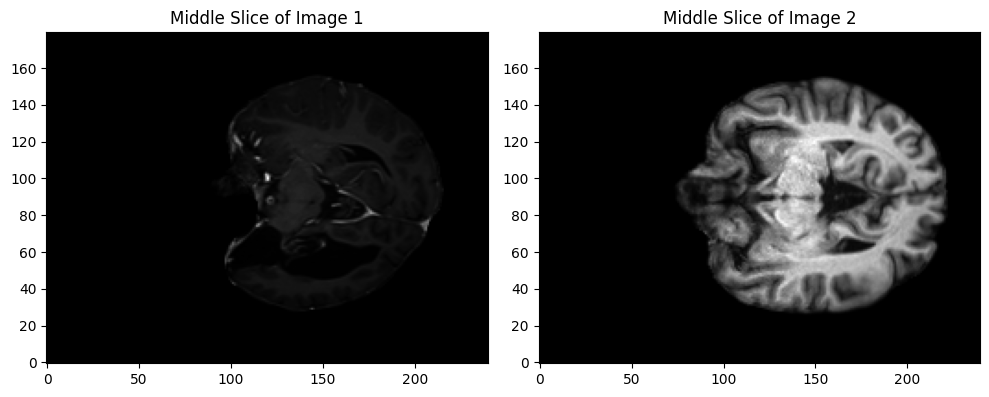

In [34]:
# Load the images
img0 = nib.load(images_path[0]).get_fdata()
img1 = nib.load(images_path[1]).get_fdata()

# Get the middle slice along the z-axis
middle_slice0 = img0[:, img0.shape[1] // 2, :]
middle_slice1 = img1[:, img1.shape[1] // 2, :]

# Plot the slices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(middle_slice0.T, cmap="gray", origin="lower")
axes[0].set_title("Middle Slice of Image 1")
axes[1].imshow(middle_slice1.T, cmap="gray", origin="lower")
axes[1].set_title("Middle Slice of Image 2")
plt.tight_layout()
plt.show()

(array([4.6743e+04, 4.0965e+04, 6.1340e+04, 4.0384e+04, 3.4525e+04,
        3.2855e+04, 3.1220e+04, 3.1075e+04, 3.1191e+04, 3.1917e+04,
        3.2816e+04, 3.4330e+04, 3.5825e+04, 3.8760e+04, 4.2003e+04,
        4.5089e+04, 4.7460e+04, 4.8008e+04, 4.7561e+04, 4.6105e+04,
        4.4096e+04, 4.1635e+04, 3.8649e+04, 3.6129e+04, 3.3456e+04,
        3.1893e+04, 3.0444e+04, 2.9940e+04, 3.0026e+04, 3.0649e+04,
        3.2397e+04, 3.4262e+04, 3.5752e+04, 3.5824e+04, 3.2048e+04,
        2.6543e+04, 2.0449e+04, 1.4424e+04, 9.1980e+03, 5.4610e+03,
        2.9900e+03, 1.5360e+03, 7.6200e+02, 3.2500e+02, 1.8400e+02,
        6.3000e+01, 2.5000e+01, 1.1000e+01, 9.0000e+00, 4.0000e+00]),
 array([1.68506027e-04, 1.26450993e+03, 2.52901969e+03, 3.79352946e+03,
        5.05803922e+03, 6.32254898e+03, 7.58705874e+03, 8.85156850e+03,
        1.01160783e+04, 1.13805880e+04, 1.26450978e+04, 1.39096076e+04,
        1.51741173e+04, 1.64386271e+04, 1.77031368e+04, 1.89676466e+04,
        2.02321564e+04, 2.1496

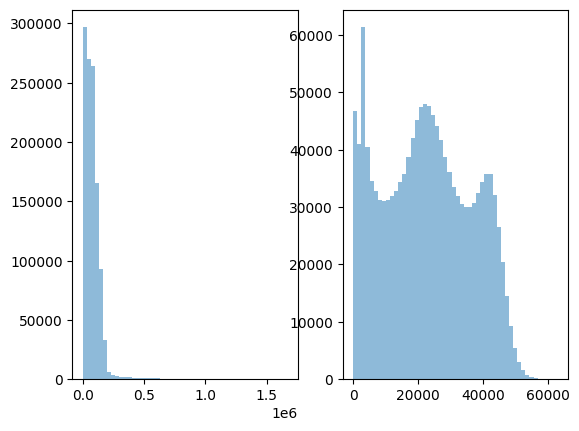

In [35]:
# Flatten the image data to 1D arrays
flat_img0 = img0.flatten()
flat_img1 = img1.flatten()

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(flat_img0[flat_img0>1e-5], bins=50, alpha=0.5, label="Image 0")
ax2.hist(flat_img1[flat_img1>1e-5], bins=50, alpha=0.5, label="Image 1")


In [36]:
reference_img = nib.load(ROOT_DIR + "datasets/reference_IXI_resampled.nii").get_fdata()

In [62]:
img0 = nib.load(images_path[0]).get_fdata()
img1 = nib.load(images_path[1]).get_fdata()


In [63]:
print(f"reference shape : {reference_img.shape}")
print(f"img0 shape : {img0.shape}")

reference shape : (240, 240, 180)
img0 shape : (240, 240, 180)


In [64]:
img0 = np.clip(img0, 1e-5, 0.5e6)
img0_hist_matched = histogram_matching(reference_img, img0)

In [65]:
print(f"reference shape : {reference_img.shape}")
print(f"img0 shape : {img0.shape}")

reference shape : (240, 240, 180)
img0 shape : (240, 240, 180)


(array([      0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0., 1732125.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.]),
 array([0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69,
        0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87, 0.89, 0.91,
        0.93, 0.95, 0.97, 0.99, 1.01, 1.03, 1.05, 1.07, 1.09, 1.11, 1.13,
        1.15, 1.17, 1.19, 1.21, 1.23, 1.25, 1.27, 1.29, 1.31, 1.33, 1.35,
        1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49]),
 <BarContainer object of 50 artists>)

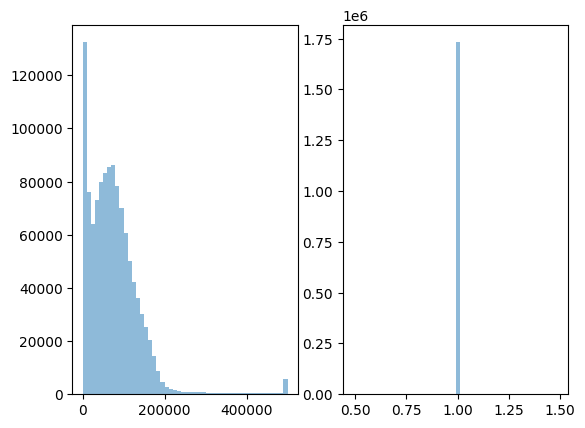

In [66]:
# Flatten the image data to 1D arrays


flat_img0 = img0.flatten()
flat_img0_hist_matched = img0_hist_matched.flatten()

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(flat_img0[flat_img0>1e-5], bins=50, alpha=0.5, label="Image 1")
ax2.hist(flat_img0_hist_matched[flat_img0_hist_matched>1e-5], bins=50, alpha=0.5, label="Image 2")


In [67]:
print(np.max(img0))
print(np.max(img0_hist_matched))

500000.0
0.99


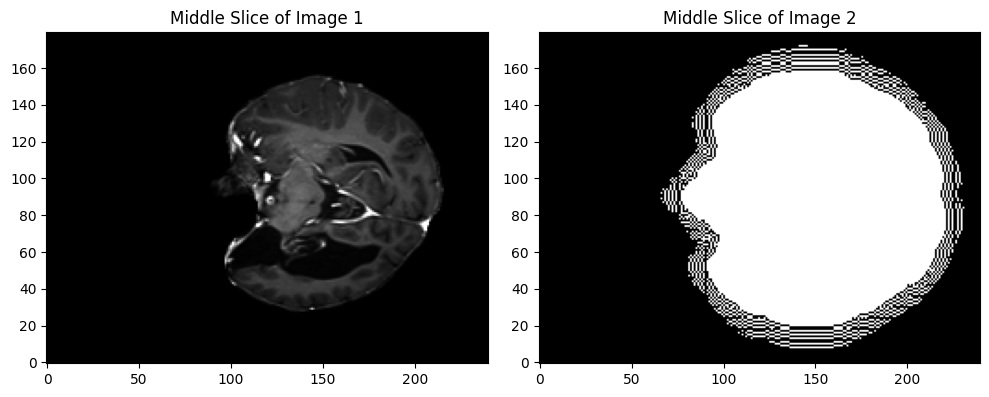

In [68]:

# Get the middle slice along the z-axis
middle_slice_img0 = img0[:, img0.shape[1] // 2, :]
middle_slice_img0_hist_matched = img0_hist_matched[:, img0_hist_matched.shape[1] // 2, :]

# Plot the slices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(middle_slice_img0.T, cmap="gray", origin="lower")
axes[0].set_title("Middle Slice of Image 1")
axes[1].imshow(middle_slice_img0_hist_matched.T, cmap="gray", origin="lower")
axes[1].set_title("Middle Slice of Image 2")
plt.tight_layout()
plt.show()